<a href="https://colab.research.google.com/github/narendrasingh2807/TEXT-TO-SPEECH--CONVERSION-USING-GTTS/blob/main/ann_project_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# part-1 Data preprocessing


In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#importing dataset
dataset=pd.read_csv('/content/Churn_Modelling.csv')
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [3]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [4]:
# Concatenate the data frames

X=pd.concat([X,geography,gender],axis=1)

In [5]:
#Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [6]:
# Spliting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
#Feature scalling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Part-2 Now lets make the ANN


In [8]:
#Importing the keras libraries and packages
import keras
from keras.models import Sequential #Sequential will initialize the neural network
from keras.layers import Dense #dense will build the hidden layer
#from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [9]:
#Initialising the ANN
classifier=Sequential()

In [11]:
#Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
#Adding the second hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

In [13]:
#Adding the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))


In [14]:
#Compiling the ANN
classifier.compile(optimizer='adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:

#Fitting the ANNto the Training set
model_history=classifier.fit(X_train,y_train,validation_split=0.32,batch_size=10,epochs=50)

Epoch 1/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8601 - loss: 0.3488 - val_accuracy: 0.8532 - val_loss: 0.3640
Epoch 2/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8545 - loss: 0.3472 - val_accuracy: 0.8532 - val_loss: 0.3639
Epoch 3/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8608 - loss: 0.3392 - val_accuracy: 0.8536 - val_loss: 0.3635
Epoch 4/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8573 - loss: 0.3462 - val_accuracy: 0.8540 - val_loss: 0.3636
Epoch 5/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8591 - loss: 0.3388 - val_accuracy: 0.8508 - val_loss: 0.3632
Epoch 6/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8550 - loss: 0.3566 - val_accuracy: 0.8528 - val_loss: 0.3635
Epoch 7/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8594 - loss: 0.3526 - val_accuracy: 0.8524 - val_loss: 0.3627
Epoch 8/50
544/544 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8624 - loss: 0.3416 - val_accuracy: 0.

In [26]:
# List all data in history
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


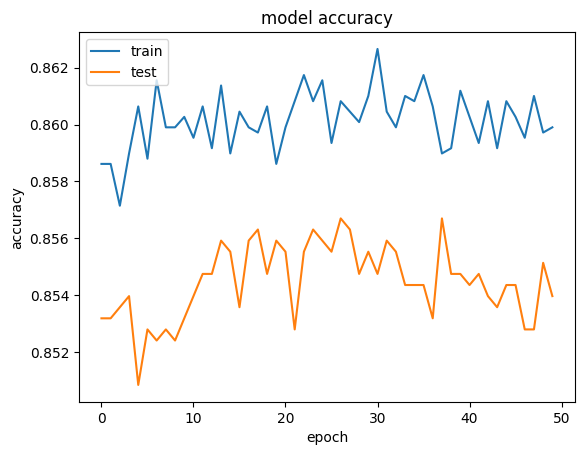

In [27]:
#Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

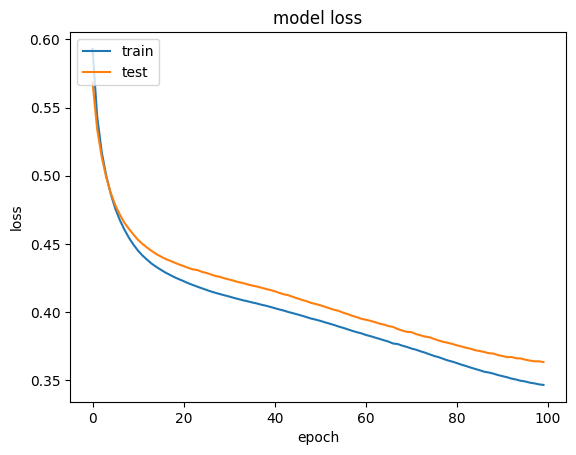

In [21]:
#Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

Part-3 Making the predictions and evaluating the model

In [22]:
#Predicting the Test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [28]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1527   68]
 [ 205  200]]


In [29]:
#Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.8635
